# Welcome!

First of all, I'm honored that you want to read my notebook. Even if you're the professor/TA, and you have to for grading, it's still appreciated.

Next, lets talk about what I'm doing. I've pulled public data on airlines from the following site: https://openflights.org/data.html

This site is great because it has a clear data dictionary (copied later on in this notebook), lots of data, and the data is already cleaned.


Some of my goals for this notebook are to complete these tasks:
1. Create a faceted plot in ggplot of a public data set use size, shape and color as well as facets.
    1. 
1. Create a Correlation Heatmap in Seaborn using a public dataset.
1. Create your own Test and Training sets using a public dataset.




## Notebook organization
1. Importing libraries and loading the data
1. EDA
1. Requirement 1
1. Requirement 2
1. Requirement 3
1. Takeaways/conclusion

## 1. Importing Libraries and Loading the Data

In [ ]:
import pandas as pd
import numpy as np

from ggplot import *

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

## 2. EDA
### This is where the data came from:
https://openflights.org/data.html

In [36]:
airlines_url = 'https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat'

airlines = pd.read_csv(airlines_url, header=None)

In [37]:
airlines.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


Below is the data dictionary, pulled from their site:
1. **Airport ID** - Unique OpenFlights identifier for this airport.
1. **Name** - Name of airport. May or may not contain the City name.
1. **City** - Main city served by airport. May be spelled differently from Name.
1. **Country** - Country or territory where airport is located. See countries.dat to cross-reference to ISO 3166-1 codes.
1. **IATA** - 3-letter IATA code. Null if not assigned/unknown.
1. **ICAO** - 4-letter ICAO code. Null if not assigned.
1. **Latitude** - Decimal degrees, usually to six significant digits. Negative is South, positive is North.
1. **Longitude** - Decimal degrees, usually to six significant digits. Negative is West, positive is East.
1. **Altitude** - In feet.
1. **Timezone** - Hours offset from UTC. Fractional hours are expressed as decimals, eg. India is 5.5.
1. **DST** - Daylight savings time. One of E (Europe), A (US/Canada), S (South America), O (Australia), Z (New Zealand), N (None) or U (Unknown). See also: Help: Time
1. **Tz database time zone** - Timezone in "tz" (Olson) format, eg. "America/Los_Angeles".
1. **Type** - Type of the airport. Value "airport" for air terminals, "station" for train stations, "port" for ferry terminals and "unknown" if not known. In airports.csv, only type=airport is included.
1. **Source** - Source of this data. "OurAirports" for data sourced from OurAirports, "Legacy" for old data not matched to OurAirports (mostly DAFIF), "User" for unverified user contributions. In airports.csv, only source=OurAirports is included.

Rename column headers because they were not passed through in the data. 
This info is being pulled from the data dictionary on the website.

In [38]:
airlines = airlines.rename(index=str, columns={0: "Airport_ID", 1: "Name", 2: "City", 3: "Country", 4: "IATA", 5: "ICAO", 6: "Latitude", 7: "Longitude", 8: "Altitude", 9: "Timezone", 10: "DST", 11: "Tz_database_time_zone", 12: "Type", 13: "Source"})

# remove columns Source and Type because those columns are always "OurAirports" and "airport" respectively
airlines = airlines.drop(['Source', 'Type'], axis=1)

In [39]:
airlines.head()

,Airport_ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz_database_time_zone
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby


In [75]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7184 entries, 0 to 7183
Data columns (total 12 columns):
Airport_ID               7184 non-null int64
Name                     7184 non-null object
City                     7140 non-null object
Country                  7184 non-null object
IATA                     7182 non-null object
ICAO                     7184 non-null object
Latitude                 7184 non-null float64
Longitude                7184 non-null float64
Altitude                 7184 non-null int64
Timezone                 7184 non-null object
DST                      7184 non-null object
Tz_database_time_zone    7184 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 729.6+ KB


How many unique values are there for some of these fields?
Basically this tells us that this dataset is pretty big. 
One consequence of that will be that many visualizations will not fit well into one graph unless we first subset the data

In [41]:
# 237 unique countries

airlines['Country'].nunique()

237

In [42]:
# 6510 unique cities
airlines['City'].nunique()

6510

In [43]:
# 7184 unique airports
airlines['Airport_ID'].nunique()

7184

In [44]:
# How many airports are in each DST
# E (Europe), A (US/Canada), S (South America), O (Australia), Z (New Zealand), N (None) or U (Unknown
airlines['DST'].value_counts()

U     1799
A     1692
E     1568
N     1168
S      383
\N     310
O      214
Z       50
Name: DST, dtype: int64

In [45]:
# What is the range of Altitude in this data? 
# Min: -1266

min(airlines['Altitude'])

-1266

In [46]:
# max: 14219

max(airlines['Altitude'])

14219

In [47]:
# Altitude bins
# from [-1,300 to 15000) with 1000 ft buckets

altitude_bins = pd.cut(airlines["Altitude"], np.arange(-1300, 15000, 1000))

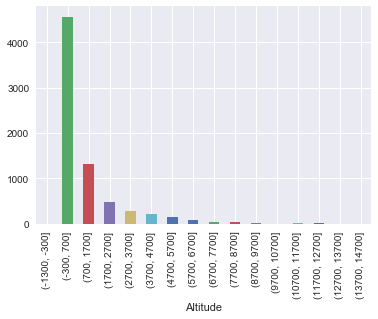

In [48]:
altitude_bar = airlines.groupby(altitude_bins).count()
altitude_bar['Name'].plot.bar()

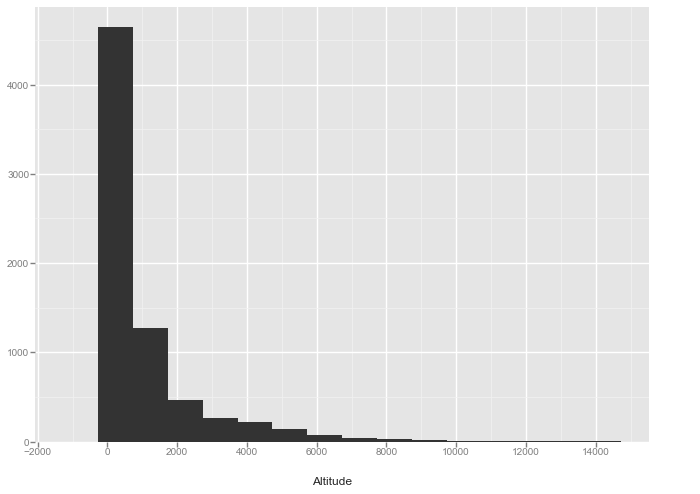

<ggplot: (295435577)>

In [49]:
# same graph in ggplot2

ggplot(aes(x='Altitude'), data = airlines) +\
    geom_histogram(binwidth=1000)

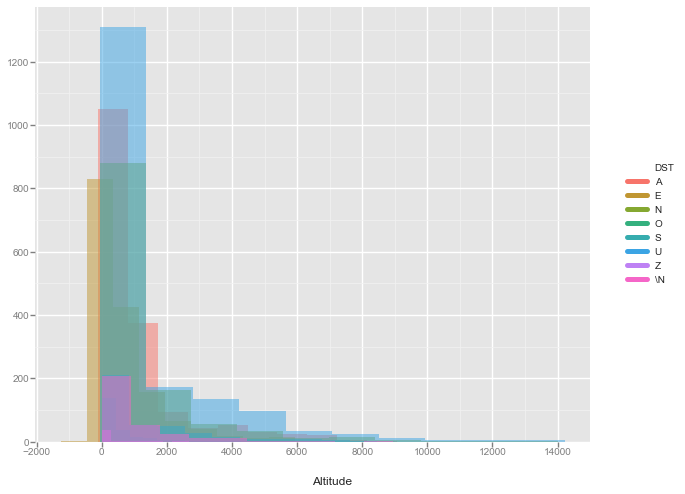

<ggplot: (295082735)>

In [50]:
# let's add some color

ggplot(aes(x='Altitude', fill = "DST"), data = airlines) +\
    geom_histogram(alpha = 0.5)

Looks like the majority of altitudes are between 0 and 1500 feet. This makes sense, and is actually surprising to me how many there are that are at extremely high altitudes. This represents a point of additional inquiry for me, where I would like to look into the differences in countries by altitude bins.

In [51]:
airlines.dtypes

Airport_ID                 int64
Name                      object
City                      object
Country                   object
IATA                      object
ICAO                      object
Latitude                 float64
Longitude                float64
Altitude                   int64
Timezone                  object
DST                       object
Tz_database_time_zone     object
dtype: object

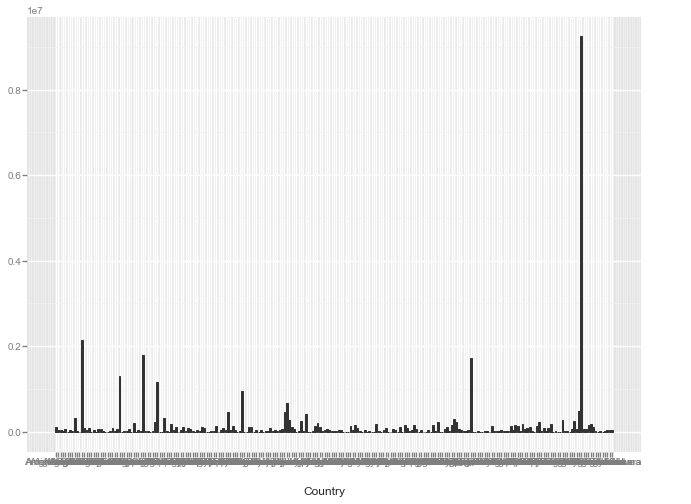

<ggplot: (-9223372036559493404)>

In [52]:
# How many Airports are there by country? There are so many countries, it's really impossible to see this in any detail
ggplot(aes(x = 'Country', weight = 'Airport_ID'),data = airlines) +\
    geom_bar(stat='identity')

The above graph is way too crowded.
We can narrow down the above graph and only look at a subsection of countries at a time

In [53]:
amurica_subset = airlines.loc[airlines['DST'] == 'A']; amurica_subset.head()

,Airport_ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz_database_time_zone
20,21,Sault Ste Marie Airport,Sault Sainte Marie,Canada,YAM,CYAM,46.485001,-84.509399,630,-5,A,America/Toronto
21,22,Winnipeg / St. Andrews Airport,Winnipeg,Canada,YAV,CYAV,50.056400,-97.032501,760,-6,A,America/Winnipeg
22,23,Halifax / CFB Shearwater Heliport,Halifax,Canada,YAW,CYAW,44.639702,-63.499401,144,-4,A,America/Halifax
23,24,St. Anthony Airport,St. Anthony,Canada,YAY,CYAY,51.391899,-56.083099,108,-3.5,A,America/St_Johns
24,25,Tofino / Long Beach Airport,Tofino,Canada,YAZ,CYAZ,49.079833,-125.775583,80,-8,A,America/Vancouver


In [54]:
amurica_bar = ggplot(aes(x = 'Country'),data = amurica_subset) +\
    geom_bar() +\
    xlab("Country") +\
    ylab("Number of Records") +\
    ggtitle("Number of airports by country in the Americas (US/Canada) DST")
    

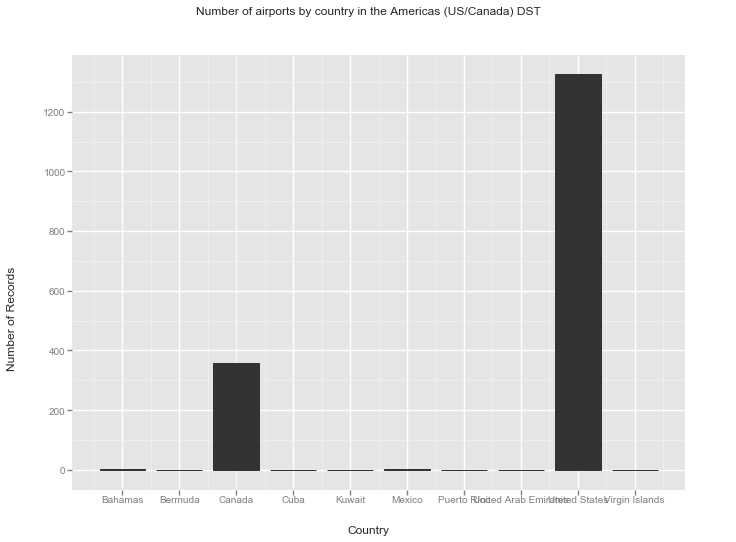

<ggplot: (-9223372036559302824)>

In [55]:
amurica_bar

Within that subset, the United States of America has, by far, the most airports. Followed by Canada, which is less than 1/3 the USA.

## 3. Requirement 1
Create a faceted plot in ggplot of a public data set use size, shape and color as well as facets.

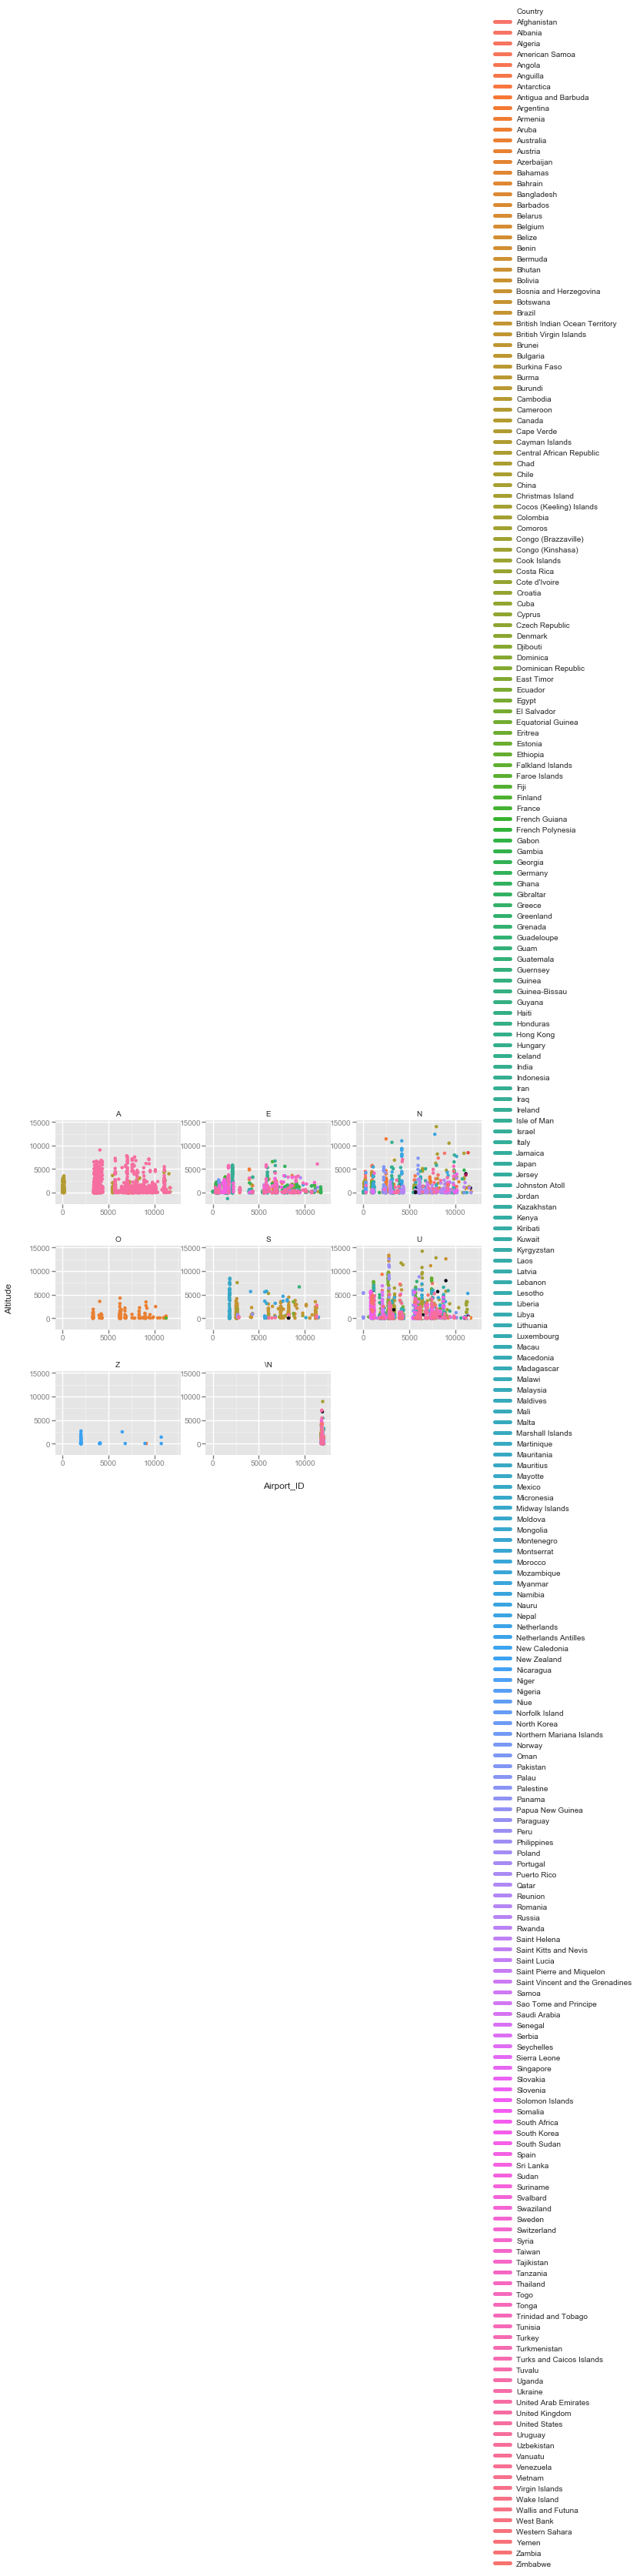

<ggplot: (-9223372036536348686)>

In [80]:
# attempt number 1
ggplot(airlines, aes(x='Airport_ID', y='Altitude', color = 'Country')) +\
    geom_point() +\
    facet_wrap("DST")

I can already tell that this dataset is too large to look at the whole thing with these dimensions. Let's try it with the subset we created earlier.

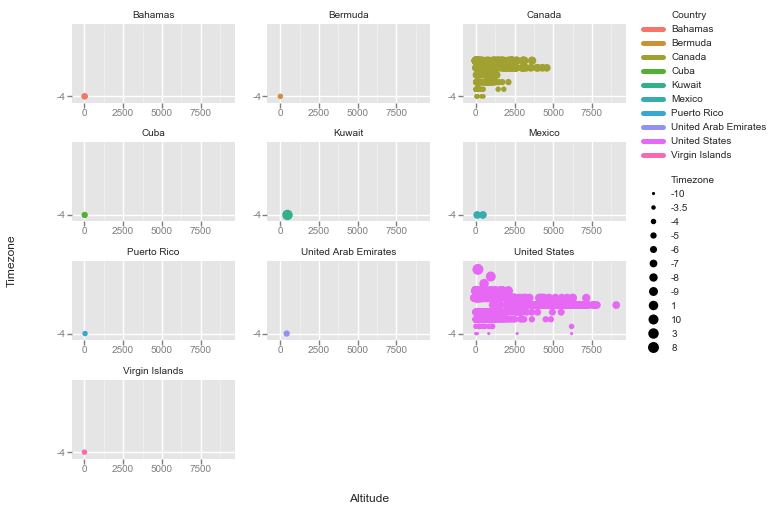

<ggplot: (325409898)>

In [82]:
# facet bar graph with america subset. Color based on Country, size based on Timezone.

ggplot(amurica_subset, aes(x='Altitude', y='Timezone', color = "Country",size='Timezone')) +\
    geom_point() +\
    facet_wrap("Country")

## 4. Requirement 2
Create a Correlation Heatmap in Seaborn



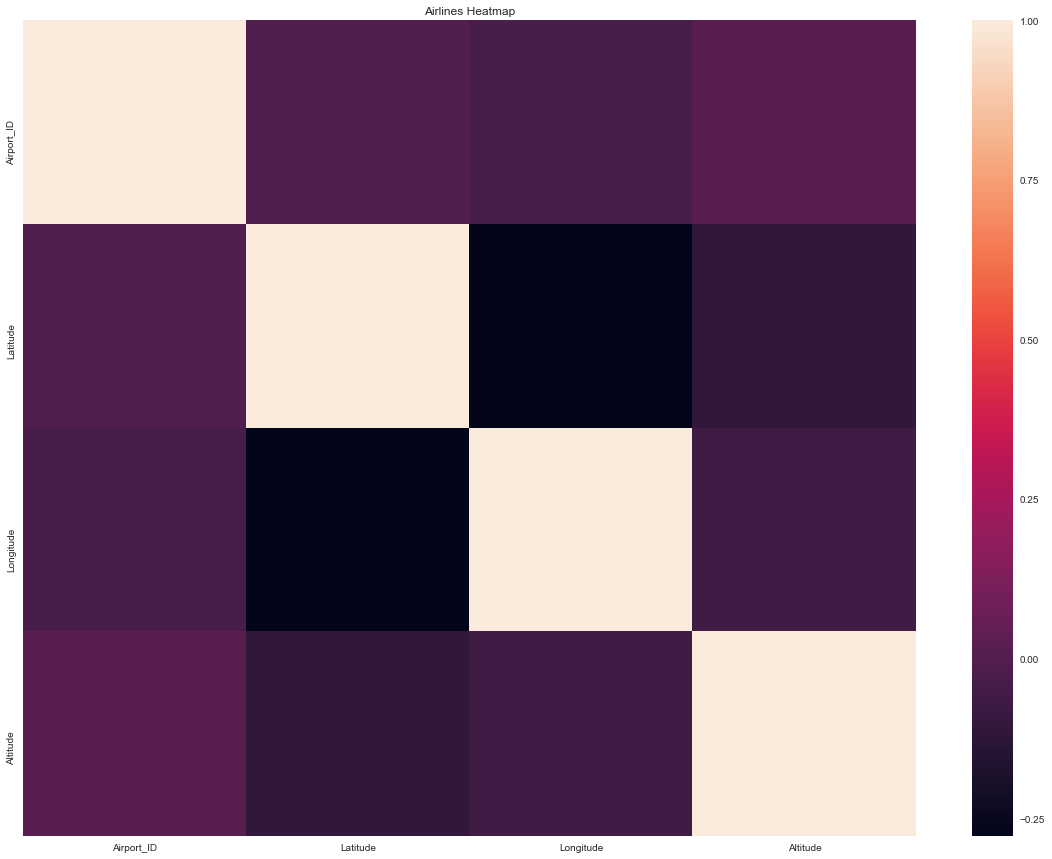

In [59]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Airlines Heatmap")
corr = airlines.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## 5. Requirement 5
Create your own Test and Training set

When splitting into a test and train set, the purpose is for then applying some sort of machine learning technique on the data in order to train that method. In this case, the prediction would be, given some inputs, can we create a model to predict airport Altitude.

In [76]:
from sklearn import cross_validation
X = airlines.drop(["Altitude"], axis = 1).values
Y = airlines["Altitude"].values
train_X, test_X, train_Y, test_Y = cross_validation.train_test_split(X, Y, test_size = 0.2)

## 6. Takeaway/conclusion

This data is great at first glance, but upon further digging, I realized that it was lacking many qualities that make it a good candidate for machine learning. There are not many quantitative variables in this dataset, and many of those that are are identifiers (Airport_ID, Timezone, Lat/Long). To continue deriving insights, it would be interesting to look around and see if there is more data that can be combined with this set. Can we find information on the number of daily flights for each airport, or the number of employees? Such things would allow us to play around more.

That being said, there is still plenty that can be done with the data that we do have. We were able to primarily look at the counts by country and DST, as well as information on Altitudes of airports. 

Most importantly, this was eye-opening to how to use ggplot in python, and how to make a fully fleshed out notebook. There is plenty more that can be done here, but as a first pass (for school), I am happy with the work I did. Maybe I'll pick this up again in the future and build off of the foundation that I've put together.